In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [9]:
file = "Einstein_A.xlsx"

def Amplitude_model(x,A0,T):
    omega = 2* np.pi*x
    return(A0*T/np.sqrt(1+(omega**2)*(T**2)))

p0_guess = [1,0.003]

bounds_guess = [
    [0, #A0
     0 #T
     ],
    [
    np.inf, #A0
    np.inf #T
    ]
]

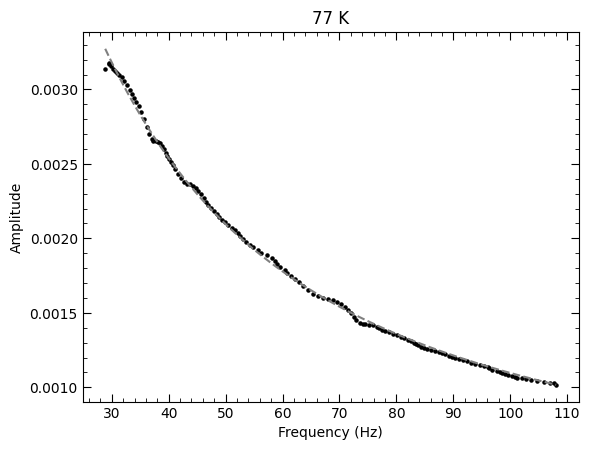

77_F_0: Time const = 0.008801 ± 0.000115
77_F_0: A = 113.618072


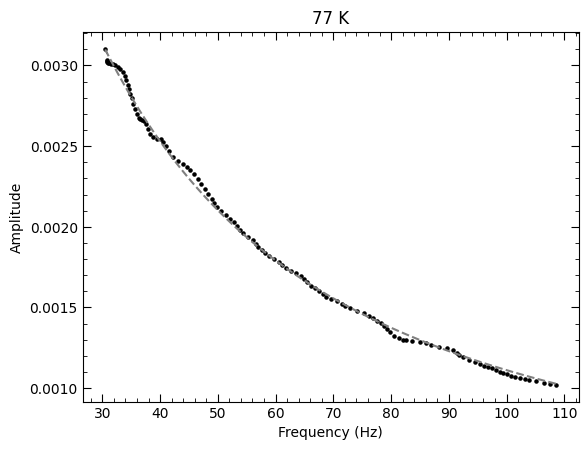

77_F_1: Time const = 0.007865 ± 0.000116
77_F_1: A = 127.152310


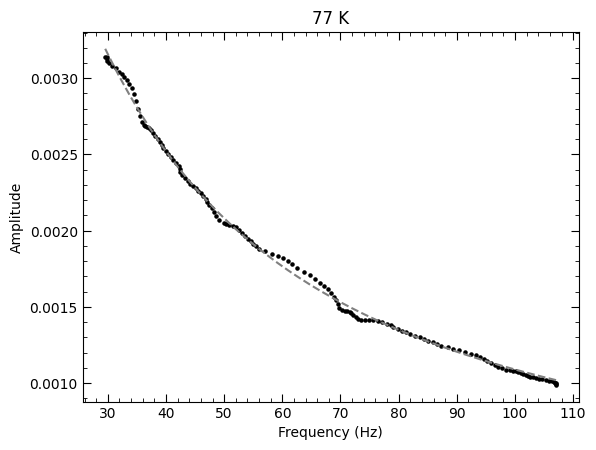

77_F_2: Time const = 0.008782 ± 0.000140
77_F_2: A = 113.872923


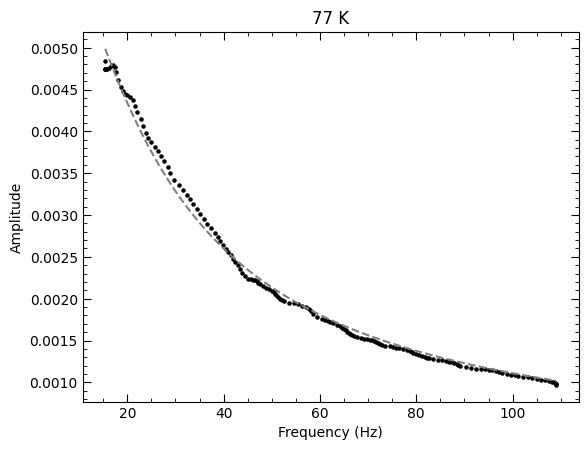

77_F_3: Time const = 0.009682 ± 0.000137
77_F_3: A = 103.284414


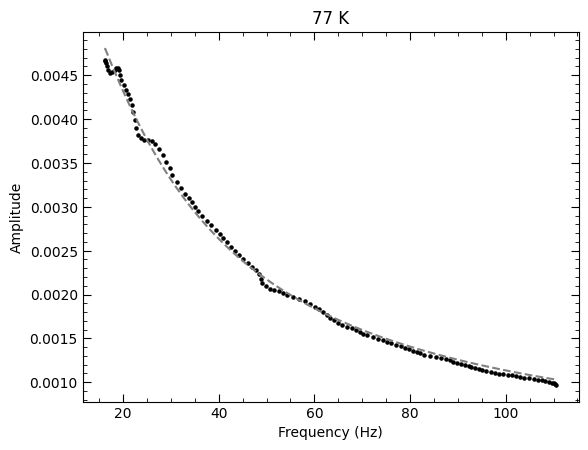

77_F_4: Time const = 0.009024 ± 0.000122
77_F_4: A = 110.820789


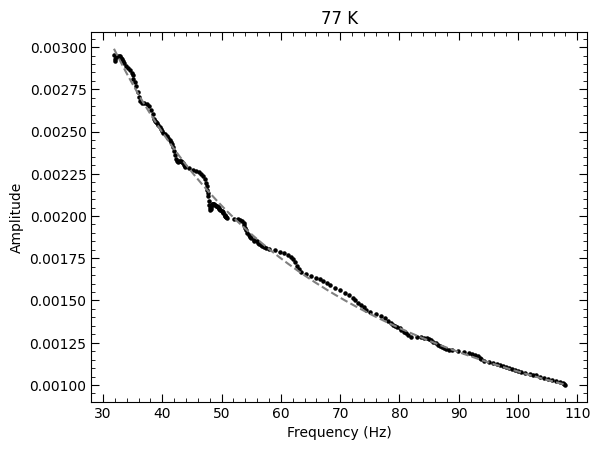

77_F_5: Time const = 0.008732 ± 0.000149
77_F_5: A = 114.523425


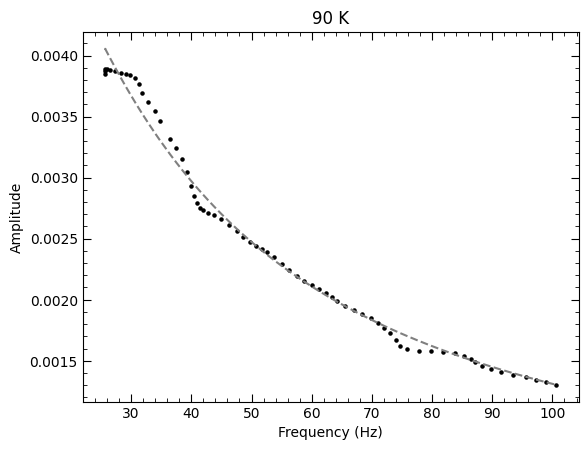

90_F_0: Time const = 0.007684 ± 0.000279
90_F_0: A = 130.141119


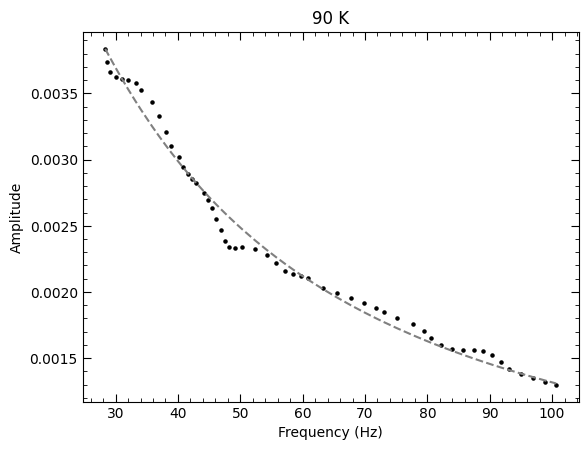

90_F_1: Time const = 0.007711 ± 0.000396
90_F_1: A = 129.677572


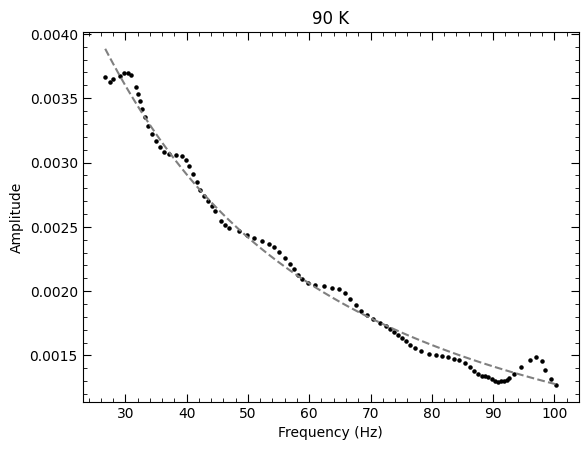

90_F_2: Time const = 0.007800 ± 0.000269
90_F_2: A = 128.200526


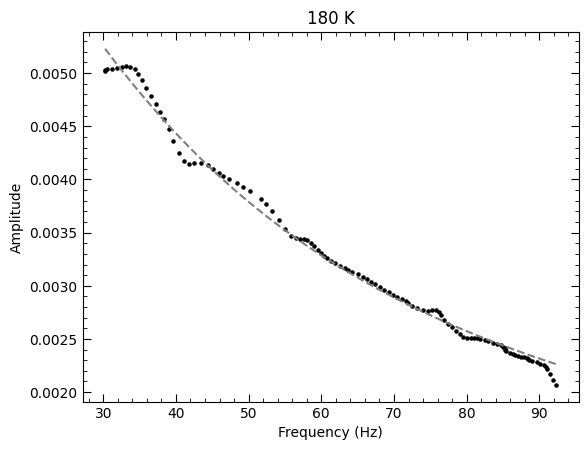

180_F_0: Time const = 0.005498 ± 0.000089
180_F_0: A = 181.888358


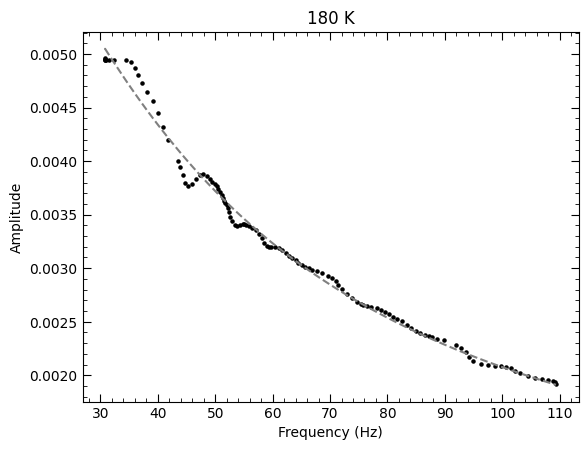

180_F_1: Time const = 0.005326 ± 0.000096
180_F_1: A = 187.774032


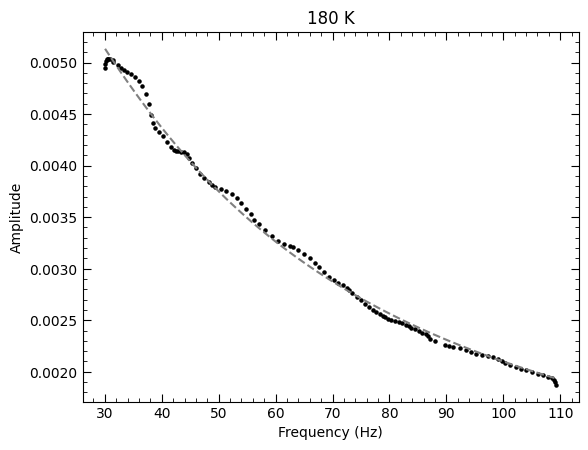

180_F_2: Time const = 0.005229 ± 0.000060
180_F_2: A = 191.249738

Averaged time constants (with SEM):
77 K: 0.008814 ± 0.000239
90 K: 0.007732 ± 0.000035
180 K: 0.005351 ± 0.000079

Averaged time constants (with SEM):
77 K: 113.878656 ± 3.153105
90 K: 129.339739 ± 0.585113
180 K: 186.970709 ± 2.732084


In [10]:
df = pd.read_excel(file)

cols_x = ["77_F_0", "77_F_1", "77_F_2", "77_F_3", "77_F_4", "77_F_5",
          "90_F_0", "90_F_1", "90_F_2",
          "180_F_0", "180_F_1", "180_F_2"]

cols_y = ["77_I_0", "77_I_1", "77_I_2", "77_I_3", "77_I_4", "77_I_5",
          "90_I_0", "90_I_1", "90_I_2",
          "180_I_0", "180_I_1", "180_I_2"]

# Store coefficients by temperature
coeff_by_temp = {
    77: [],
    90: [],
    180: []
}

for colx, coly in zip(cols_x, cols_y):
    # Extract temperature from column name
    temp = int(colx.split("_")[0])

    xdata = df[colx].dropna()
    ydata = df[coly].dropna()

    pop, cov = curve_fit(
        Amplitude_model,
        xdata,
        ydata,
        p0=p0_guess,
        bounds=bounds_guess
    )

    # Store Einstein coefficient (T parameter)
    coeff_by_temp[temp].append(pop[1])

    # Plot as before
    plt.figure()
    plt.scatter(xdata, ydata, s=5, color="black")
    plt.plot(xdata, Amplitude_model(xdata, *pop),
             color="grey", linestyle="--")

    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.title(f"{temp} K")

    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', size = 6, direction='in',
                    right = True, top = True, left = True, bottom = True)
    plt.tick_params(axis='both', which='minor', size = 3, direction='in',
                    right = True, top = True, left = True, bottom = True)
    plt.show()

    print(f"{colx}: Time const = {pop[1]:.6f} ± {np.sqrt(cov[1][1]):.6f}")
    print(f"{colx}: A = {(1/pop[1]):.6f}")

# Compute averages with SEM
print("\nAveraged time constants (with SEM):")

for temp in coeff_by_temp:
    values = np.array(coeff_by_temp[temp])
    mean = np.mean(values)
    sem = np.std(values, ddof=1) / np.sqrt(len(values))

    print(f"{temp} K: {mean:.6f} ± {sem:.6f}")

# Compute averages with SEM
print("\nAveraged time constants (with SEM):")

for temp in coeff_by_temp:
    values_A = 1/np.array(coeff_by_temp[temp])
    mean_A = np.mean(values_A)
    sem_A = np.std(values_A, ddof=1) / np.sqrt(len(values_A))

    print(f"{temp} K: {mean_A:.6f} ± {sem_A:.6f}")